# 第5章: 係り受け解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をCaboChaを使って係り受け解析し，その結果をneko.txt.cabochaというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

In [1]:
!rm neko.txt
!wget https://nlp100.github.io/data/neko.txt

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/yukimaru/.wget-hsts'. HSTS will be disabled.
--2020-04-08 17:03:50--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.109.153, 185.199.110.153, 185.199.111.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 965825 (943K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 943.19K  1.10MB/s    in 0.8s    

2020-04-08 17:03:52 (1.10 MB/s) - ‘neko.txt’ saved [965825/965825]



In [2]:
import CaboCha

In [3]:
with open('neko.txt') as infile, open('neko.txt.cabocha','w') as outfile:
    cabocha = CaboCha.Parser()
    for line in infile:
        outfile.write(cabocha.parse(line).toString(CaboCha.FORMAT_LATTICE))

In [4]:
%%bash
head -n35 neko.txt.cabocha

* 0 -1D 0/0 0.000000
一	名詞,数,*,*,*,*,一,イチ,イチ,,
EOS
EOS
* 0 2D 0/0 -0.764522
　	記号,空白,*,*,*,*,　,　,　,,
* 1 2D 0/1 -0.764522
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ,,
は	助詞,係助詞,*,*,*,*,は,ハ,ワ,,
* 2 -1D 0/2 0.000000
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ,,
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ,,
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル,,
。	記号,句点,*,*,*,*,。,。,。,,
EOS
* 0 2D 0/1 -1.911675
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ,,
は	助詞,係助詞,*,*,*,*,は,ハ,ワ,,
* 1 2D 0/0 -1.911675
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ,,
* 2 -1D 0/0 0.000000
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ,ない/無い,
。	記号,句点,*,*,*,*,。,。,。,,
EOS
EOS
* 0 1D 1/2 1.058678
　	記号,空白,*,*,*,*,　,　,　,,
どこ	名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ,,
で	助詞,格助詞,一般,*,*,*,で,デ,デ,,
* 1 4D 0/2 -1.453749
生れ	動詞,自立,*,*,一段,連用形,生れる,ウマレ,ウマレ,うまれ/生まれ/生れ,
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ,,
か	助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ,,
* 2 4D 0/0 -1.453749
とんと	副詞,一般,*,*,*,*,とんと,トント,トント,,


In [5]:
def get_sentence_line(f):
    sentence_line = []
    for line in f:
        line = line.rstrip()
        if line == "EOS": 
            yield sentence_line
            sentence_line = []
        else: sentence_line.append(line)
    yield sentence_line
          
def get_chunk_line(sentence_line):
    chunk_line = []
    for word_line in sentence_line:
        if word_line[0] == "*":
            yield chunk_line
            chunk_line = []
        chunk_line.append(word_line)
    yield chunk_line

## 40. 係り受け解析結果の読み込み（形態素）
形態素を表すクラスMorphを実装せよ．このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，CaboChaの解析結果（neko.txt.cabocha）を読み込み，各文をMorphオブジェクトのリストとして表現し，3文目の形態素列を表示せよ．

参考 # ["pos","pos1","pos2","pos3","conjt","conjf","base","ruby","pron","?","?"]

In [6]:
# ※代入式(:=)はpython3.8から使用可能
!python -V

Python 3.8.0


In [7]:
class Morph:
    def __init__(self,line):
        self.make_morph(line)
    
    def make_morph(self,line):
        self.surface, left = line.split('\t')
        self.pos, self.pos1, _,_,_,_, self.base, = left.split(",")[:7]
    
    def get_all(self):
        return {"surface":self.surface, "base":self.base, "pos":self.pos, "pos1":self.pos1}

In [8]:
with open('neko.txt.cabocha') as f:
    sentences = []
    for i,sentence_line in enumerate(get_sentence_line(f)):
        chunks = []
        for chunk_line in get_chunk_line(sentence_line):
            if chunk_line == []: continue
            chunk_line.pop(0)
            for word_line in chunk_line:
                chunks.append(Morph(word_line))
        sentences.append(chunks)
        if len(sentences)>=3: break

print(*[morph.get_all() for morph in sentences[-1]],sep="\n")

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


## 41. 係り受け解析結果の読み込み（文節・係り受け）
40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストのCaboChaの解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，8文目の文節の文字列と係り先を表示せよ．第5章の残りの問題では，ここで作ったプログラムを活用せよ．

> \* 0 6D 0/1 -2.457381

\* chunk_num かかり先id(-1は無し)D 主辞/機能語 係り関係のスコア

In [9]:
class Chunk:
    def __init__(self, first):
        self.id = int(first.split(' ')[1])
        self.dst = int(first.split(' ')[2].rstrip("D"))
        self.srcs = []
        self.morphs = []
        self.dst_m = None
        self.srcs_m = []
    
    def __call__(self,i):
        return self.morphs[i]
    
    def __len__(self):
        return len(self.morphs)
    
    def add_morph(self, line):
        morph = Morph(line)
        self.morphs.append(morph)
        
    def find(self,*,surface=None,base=None,pos=None,pos1=None,index="no"):
        morphs = {i:m for i,m in enumerate(self.morphs)}
        if surface: morphs = {i:m for i,m in morphs.items() if m.surface==surface}
        if base:    morphs = {i:m for i,m in morphs.items() if m.base   ==base}
        if pos:     morphs = {i:m for i,m in morphs.items() if m.pos    ==pos}
        if pos1:    morphs = {i:m for i,m in morphs.items() if m.pos1   ==pos1}
        if index=="no": return list(morphs.values())
        if index=="only": return list(morphs.keys())
        return morphs

    def get_plane(self):
        return "".join([morph.surface for morph in self.morphs])
      
    def get_plane_without_mark(self):
        return "".join([morph.surface for morph in self.morphs if morph.pos!="記号"])

In [10]:
def parse_f(f, stop=None):
    for i,sentence_line in enumerate(get_sentence_line(f),1):
        chunks = {}
        for chunk_line in get_chunk_line(sentence_line):
            if chunk_line == []: continue
            chunk = Chunk(chunk_line.pop(0))
            for word_line in chunk_line:
                chunk.add_morph(word_line)
            chunks[chunk.id] = chunk
        for chunk in chunks.values():
            if chunk.dst!=-1: 
                chunk.dst_m = chunks[chunk.dst]
                chunk.dst_m.srcs.append(chunk.id)
                chunk.dst_m.srcs_m.append(chunks[chunk.id])
        yield chunks
        if stop is not None and i >= stop: return
    yield chunks

In [11]:
def parse_neko(stop=None):
    with open('neko.txt.cabocha') as f:
        for sentence in parse_f(f, stop):
            yield sentence

In [12]:
sentences = [s for s in parse_neko(8)]
print(*["{} {} \t-> {}".format(chunk.id,chunk.get_plane(),chunk.dst) for chunk in sentences[7].values()],sep="\n")

0 吾輩は 	-> 5
1 ここで 	-> 2
2 始めて 	-> 3
3 人間という 	-> 4
4 ものを 	-> 5
5 見た。 	-> -1


## 42. 係り元と係り先の文節の表示
係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ.

In [13]:
sentence = [s for s in parse_neko(8)][7]
print(*["{} {} \t-> {} {}".format(chunk.id,chunk.get_plane_without_mark(),chunk.dst,(chunk.dst_m.get_plane_without_mark() if chunk.dst!=-1 else "")) 
        for chunk in sentence.values()],sep="\n")

0 吾輩は 	-> 5 見た
1 ここで 	-> 2 始めて
2 始めて 	-> 3 人間という
3 人間という 	-> 4 ものを
4 ものを 	-> 5 見た
5 見た 	-> -1 


## 43. 名詞を含む文節が動詞を含む文節に係るものを抽出
名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [14]:
for sentence in parse_neko(10):
    l = ["{} {} \t-> {} {}".format(chunk.id,chunk.get_plane_without_mark(),chunk.dst,chunk.dst_m.get_plane_without_mark())
            for chunk in sentence.values() if chunk.dst!=-1 and len(chunk.find(pos="名詞"))>0 and len(chunk.dst_m.find(pos="動詞"))>0]
    if len(l)>0: print(*l,sep="\n")

0 どこで 	-> 1 生れたか
3 見当が 	-> 4 つかぬ
3 所で 	-> 5 泣いていた
4 ニャーニャー 	-> 5 泣いていた
6 事だけは 	-> 7 記憶している
0 吾輩は 	-> 5 見た
1 ここで 	-> 2 始めて
4 ものを 	-> 5 見た
3 我々を 	-> 4 捕えて


## 44. 係り受け木の可視化
与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，係り受け木を[DOT言語](http://ja.wikipedia.org/wiki/DOT%E8%A8%80%E8%AA%9E)に変換し，[Graphviz](http://www.graphviz.org/)を用いるとよい．また，Pythonから有向グラフを直接的に可視化するには，[pydot](https://code.google.com/p/pydot/)を使うとよい．

digraph G {
	"与えられた" -> "文の";
	"文の" -> "係り";
	"係り" -> "受け木を";
	"受け木を" -> "可視化せよ";
	"有向グラフとして" -> "可視化せよ";
}


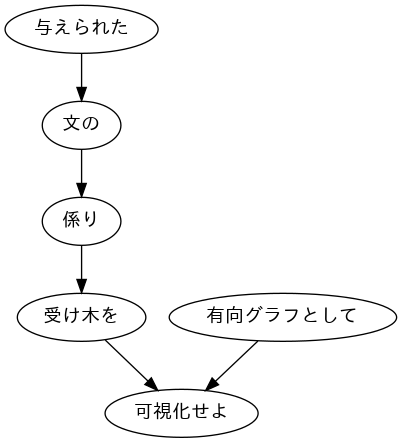

In [15]:
import pydot
from IPython.display import Image, display

def row_to_cabocha(text):
    cabocha = CaboCha.Parser()
    return cabocha.parse(text).toString(CaboCha.FORMAT_LATTICE).rstrip().split("\n")

def convert_to_dot(text):
    ss = row_to_cabocha(text)
    dot_lang = []
    for sentence in parse_f(ss):
        if not sentence: continue
        dot_lang.append("digraph G {")
        for chunk in sentence.values():
            if chunk.dst != -1:
                dot_lang.append('\t"{}" -> "{}";'.format(chunk.get_plane_without_mark(),chunk.dst_m.get_plane_without_mark()))
        dot_lang.append("}")
    return "\n".join(dot_lang)

def print_graph(dot):
    graphs = pydot.graph_from_dot_data(dot)
    for graph in graphs:
        display(Image(graph.create(format="png")))

dot_lang = convert_to_dot("与えられた文の係り受け木を有向グラフとして可視化せよ．")
print(dot_lang)
print_graph(dot_lang)

## 45. 動詞の格パターンの抽出
今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ． ただし，出力は以下の仕様を満たすようにせよ．
+ 動詞を含む文節において，最左の動詞の基本形を述語とする
+ 述語に係る助詞を格とする
+ 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる

「吾輩はここで始めて人間というものを見た」という例文（neko.txt.cabochaの8文目）を考える． この文は「始める」と「見る」の２つの動詞を含み，「始める」に係る文節は「ここで」，「見る」に係る文節は「吾輩は」と「ものを」と解析された場合は，次のような出力になるはずである．
> 始める  で \
> 見る    は を

このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．
+ コーパス中で頻出する述語と格パターンの組み合わせ
+ 「する」「見る」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）

In [16]:
for sentence in parse_neko(8):
    for chunk in sentence.values():
        if not (vs:=chunk.find(pos="動詞")): continue
        verb = vs[0]
        sms = [sm.find(pos="助詞")[0] for sm in chunk.srcs_m if sm.find(pos="助詞")] # 1文節にひとつの助詞と仮定
        if len(sms): print("{}\t{}".format(verb.base," ".join([m.base for m in sms])))

生れる	で
つく	か が
泣く	で
する	だけ
始める	で
見る	は を


In [17]:
with open('case_pattern.txt','w') as f:
    for sentence in parse_neko():
        for chunk in sentence.values():
            if not (vs:=chunk.find(pos="動詞")): continue
            verb = vs[0]
            sms = [sm.find(pos="助詞")[0] for sm in chunk.srcs_m if sm.find(pos="助詞")] # 1文節にひとつの助詞と仮定
            if len(sms): f.write("{}\t{}\n".format(verb.base," ".join([m.base for m in sms])))

In [18]:
%%bash
sort case_pattern.txt | uniq -c | sort -rn | head -n5

    579 云う	と
    439 する	を
    258 思う	と
    209 なる	に
    196 ある	が


In [19]:
%%bash
grep "^する" case_pattern.txt | sort | uniq -c | sort -rn | head -n5
echo 
grep "^見る" case_pattern.txt | sort | uniq -c | sort -rn | head -n5
echo 
grep "^与える" case_pattern.txt | sort | uniq -c | sort -rn | head -n5

    439 する	を
    186 する	に
    136 する	と
    120 する	が
    101 する	て を

    175 見る	て
     90 見る	を
     26 見る	て て
     20 見る	から
     15 見る	と

      4 与える	に を
      1 与える	ば を
      1 与える	は て に を に
      1 与える	は て に を
      1 与える	に に対して も


## 46. 動詞の格フレーム情報の抽出
45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力せよ．45の仕様に加えて，以下の仕様を満たすようにせよ．
+ 項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）
+ 述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる

「吾輩はここで始めて人間というものを見た」という例文（neko.txt.cabochaの8文目）を考える． この文は「始める」と「見る」の２つの動詞を含み，「始める」に係る文節は「ここで」，「見る」に係る文節は「吾輩は」と「ものを」と解析された場合は，次のような出力になるはずである．
> 始める  で      ここで \
> 見る    は を   吾輩は ものを

In [20]:
for sentence in parse_neko(8):
    for chunk in sentence.values():
        if not (vs:=chunk.find(pos="動詞")): continue
        verb = vs[0]
        sms = [sm for sm in chunk.srcs_m if sm.find(pos="助詞")] # 1文節にひとつの助詞と仮定
        if len(sms): print("{}\t{}\t{}".format(verb.base," ".join([m(-1).base for m in sms])," ".join([m.get_plane_without_mark() for m in sms])))

生れる	で	どこで
つく	か が	生れたか 見当が
泣く	で	所で
する	は	事だけは
始める	で	ここで
見る	は を	吾輩は ものを


## 47. 機能動詞構文のマイニング
動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．
+ 「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする
+ 述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる
+ 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
+ 述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）

例えば「別段くるにも及ばんさと、主人は手紙に返事をする。」という文から，以下の出力が得られるはずである．
> 返事をする      と に は        及ばんさと 手紙に 主人は

このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．
+ コーパス中で頻出する述語（サ変接続名詞+を+動詞）
+ コーパス中で頻出する述語と助詞パターン

In [21]:
def tmp():
    for s in parse_f(row_to_cabocha("別段くるにも及ばんさと、主人は手紙に返事をする。")): yield s
    for s in parse_neko(100): yield s
for sentence in tmp():
    for chunk in sentence.values():
        if not (vs:=chunk.find(pos="動詞")): continue
        verb = vs[0]
        sms = [sm for sm in chunk.srcs_m if (i:=sm.find(pos="助詞",base="を",index="only")) and i[-1]!=0 and sm(i[-1]-1).pos1=="サ変接続"] # 「○を○○、」等に対応
        for m in sms:
            print("{}\t{}\t{}".format(m.get_plane_without_mark()+verb.base,
                                  " ".join([m.find(pos="助詞")[-1].base for m in [sm for sm in chunk.srcs_m if sm.find(pos="助詞")]]),
                                  " ".join([sm.get_plane_without_mark() for sm in chunk.srcs_m if sm is not m])))

返事をする	と は に を	及ばんさと 主人は 手紙に
決心をする	と を	あるこうと
返報をしてやる	んで を	偸んで
昼寝をする	を	よく
昼寝をする	が を	彼が


## 48. 名詞から根へのパスの抽出
文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ． ただし，構文木上のパスは以下の仕様を満たすものとする．
+ 各文節は（表層形の）形態素列で表現する
+ パスの開始文節から終了文節に至るまで，各文節の表現を” -> “で連結する

「吾輩はここで始めて人間というものを見た」という文（neko.txt.cabochaの8文目）から，次のような出力が得られるはずである．
> 吾輩は -> 見た \
> ここで -> 始めて -> 人間という -> ものを -> 見た \
> 人間という -> ものを -> 見た \
> ものを -> 見た

In [22]:
for sentence in parse_neko(8):
    for chunk in sentence.values():
        if not chunk.find(pos="名詞"): continue
        stack = [chunk]
        while (chunk:=chunk.dst_m): stack.append(chunk)
        print(" -> ".join([c.get_plane_without_mark() for c in stack]))

一
吾輩は -> 猫である
猫である
名前は -> 無い
どこで -> 生れたか -> つかぬ
見当が -> つかぬ
何でも -> 薄暗い -> 所で -> 泣いていた -> 事だけは -> 記憶している
所で -> 泣いていた -> 事だけは -> 記憶している
ニャーニャー -> 泣いていた -> 事だけは -> 記憶している
事だけは -> 記憶している
記憶している
吾輩は -> 見た
ここで -> 始めて -> 人間という -> ものを -> 見た
人間という -> ものを -> 見た
ものを -> 見た


## 49. 名詞間の係り受けパスの抽出
文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．ただし，名詞句ペアの文節番号がiとj（i<j）のとき，係り受けパスは以下の仕様を満たすものとする．
+ 問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を” -> “で連結して表現する
+ 文節iとjに含まれる名詞句はそれぞれ，XとYに置換する

また，係り受けパスの形状は，以下の2通りが考えられる．
+ 文節$i$から構文木の根に至る経路上に文節jが存在する場合: 文節iから文節jのパスを表示
+ 上記以外で，文節iと文節jから構文木の根に至る経路上で共通の文節kで交わる場合: 文節iから文節kに至る直前のパスと文節jから文節kに至る直前までのパス，文節kの内容を” | “で連結して表示

例えば，「吾輩はここで始めて人間というものを見た。」という文（neko.txt.cabochaの8文目）から，次のような出力が得られるはずである．
> Xは | Yで -> 始めて -> 人間という -> ものを | 見た \
> Xは | Yという -> ものを | 見た \
> Xは | Yを | 見た \
> Xで -> 始めて -> Y \
> Xで -> 始めて -> 人間という -> Y \
> Xという -> Y

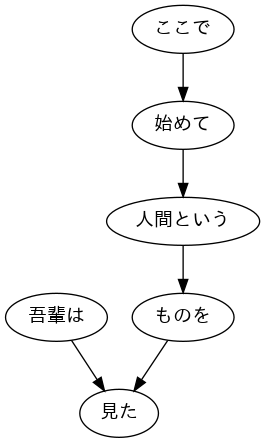

In [23]:
print_graph(convert_to_dot("吾輩はここで始めて人間というものを見た。"))

In [24]:
def get_stack(chunk,*,stop:Chunk=None,stop_list:list=[]):
    ret = [chunk]
    stop_ids = [c.id for c in stop_list]
    while (chunk:=chunk.dst_m): 
        ret.append(chunk)
        if stop!=None and chunk.id==stop.id: break
        if chunk.id in stop_ids: break
    return ret
def get_link_text(stack,*,X:Chunk=None,Y:Chunk=None):
    ret = []
    for chunk in stack:
        if   X is not None and chunk.id==X.id: ret.append("".join(["X" if m.pos=="名詞" else m.surface for m in chunk.morphs if m.pos!="記号"]))
        elif Y is not None and chunk.id==Y.id: ret.append("".join(["Y" if m.pos=="名詞" else m.surface for m in chunk.morphs if m.pos!="記号"]))
        else: ret.append(chunk.get_plane_without_mark())
    return " -> ".join(ret)

In [25]:
for sentence in parse_neko(8):
    nouns = [chunk for chunk in sentence.values() if chunk.find(pos="名詞")]
    for i in range(len(nouns)):
        for j in range(i+1,len(nouns)):
            stack_i = get_stack(nouns[i],stop=nouns[j])
            if stack_i[-1] == nouns[j]:
                print(get_link_text(stack_i,X=nouns[i],Y=nouns[j]))
            else:
                stack_j = get_stack(nouns[j],stop_list=stack_i)
                stack_i = get_stack(nouns[i],stop_list=stack_j)
                print("{}|{}|{}".format(get_link_text(stack_i[:-1],X=nouns[i]), get_link_text(stack_j[:-1],Y=nouns[j]), get_link_text([stack_i[-1]])))

Xは -> Yである
Xで -> 生れたか|Yが|つかぬ
Xでも -> 薄暗い -> Yで
Xでも -> 薄暗い -> 所で|Y|泣いていた
Xでも -> 薄暗い -> 所で -> 泣いていた -> Yだけは
Xでも -> 薄暗い -> 所で -> 泣いていた -> 事だけは -> Yしている
Xで|Y|泣いていた
Xで -> 泣いていた -> Yだけは
Xで -> 泣いていた -> 事だけは -> Yしている
X -> 泣いていた -> Yだけは
X -> 泣いていた -> 事だけは -> Yしている
Xだけは -> Yしている
Xは|Yで -> 始めて -> 人間という -> ものを|見た
Xは|Yという -> ものを|見た
Xは|Yを|見た
Xで -> 始めて -> Yという
Xで -> 始めて -> 人間という -> Yを
Xという -> Yを
